# Synthetic data

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.datasets import make_blobs
import numpy as np

In [4]:
# pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=5))
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [5]:
X, y = make_blobs(return_centers=False, n_samples=10_000, n_features=5, centers=2, cluster_std=10)
order = np.argsort(y)
y = y[order]
X = X[order]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [7]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)

knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

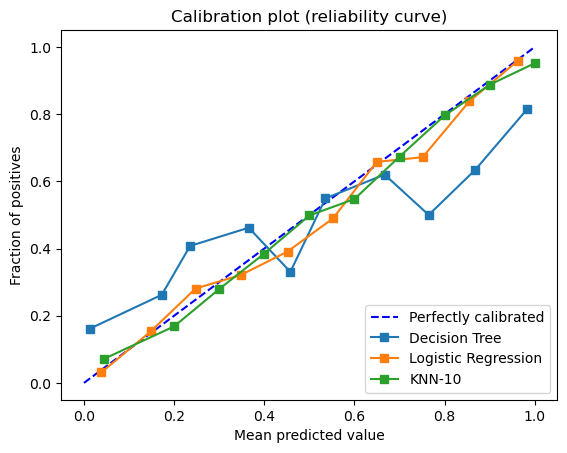

In [8]:
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

fig = plt.figure()
ax = fig.add_subplot()
ax.plot([0, 1], [0, 1], "b--", label="Perfectly calibrated")
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted value")
ax.set_title('Calibration plot (reliability curve)')

prob_dt = dt.predict_proba(X_test)[:, 1]
fraction_of_positives_rfc, mean_predicted_value_rfc = calibration_curve(y_test, prob_dt, n_bins=10)
ax.plot(mean_predicted_value_rfc, fraction_of_positives_rfc, "s-", label='Decision Tree')

prob_lr = lr.predict_proba(X_test)[:, 1]
fraction_of_positives_lr, mean_predicted_value_lr = calibration_curve(y_test, prob_lr, n_bins=10)
ax.plot(mean_predicted_value_lr, fraction_of_positives_lr, "s-", label='Logistic Regression')

prob_knn = knn.predict_proba(X_test)[:, 1]
fraction_of_positives_knn, mean_predicted_value_knn = calibration_curve(y_test, prob_knn, n_bins=10)
ax.plot(mean_predicted_value_knn, fraction_of_positives_knn, "s-", label='KNN-10')


ax.legend(loc="lower right")
plt.show()

In [9]:
bins = np.arange(0, 1.01, 0.1)

In [10]:
len(bins[1:-1])

9

In [11]:
np.searchsorted(bins[1:-1], prob_dt)

array([9, 2, 0, ..., 1, 0, 0])

In [12]:
np.bincount(np.searchsorted(bins[1:-1], prob_dt))#, weights=prob_dt)

array([1837,  244,  130,  184,  118,  122,  129,   90,  142, 2004])

# Titanic

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('../data/titanic_data.csv')

In [15]:
df[['Sex', 'Passenger Class', 'Survived', 'Age']]

X = pd.DataFrame()

X['Sex'] = df['Sex'].map({
    'Male':0,
    'Female':1
})
X['Passenger Class'] = df['Passenger Class'].map({
    'First': 1,
    'Second': 2,
    'Third': 3
})

X['Survived'] = df['Survived'].map({
    'Yes': 1,
    'No': 0
})

X['Age'] = df['Age'].fillna(-1)

y = X['Survived']
X = X.drop(['Survived'], axis=1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [17]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)

knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

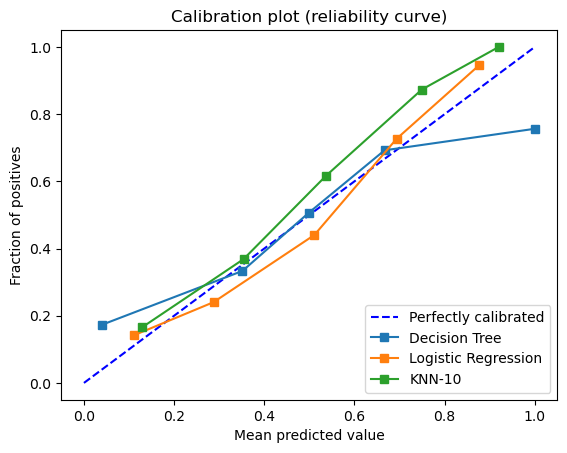

In [18]:
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

fig = plt.figure()
ax = fig.add_subplot()
ax.plot([0, 1], [0, 1], "b--", label="Perfectly calibrated")
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted value")
ax.set_title('Calibration plot (reliability curve)')

prob_dt = dt.predict_proba(X_test)[:, 1]
fraction_of_positives_rfc, mean_predicted_value_rfc = calibration_curve(y_test, prob_dt, n_bins=5)
ax.plot(mean_predicted_value_rfc, fraction_of_positives_rfc, "s-", label='Decision Tree')

prob_lr = lr.predict_proba(X_test)[:, 1]
fraction_of_positives_lr, mean_predicted_value_lr = calibration_curve(y_test, prob_lr, n_bins=5)
ax.plot(mean_predicted_value_lr, fraction_of_positives_lr, "s-", label='Logistic Regression')

prob_knn = knn.predict_proba(X_test)[:, 1]
fraction_of_positives_knn, mean_predicted_value_knn = calibration_curve(y_test, prob_knn, n_bins=5)
ax.plot(mean_predicted_value_knn, fraction_of_positives_knn, "s-", label='KNN-10')


ax.legend(loc="lower right")
plt.show()